In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [131]:
# import the data
train_data=pd.read_excel(r"Data_Train.xlsx")

In [132]:
pd.set_option('display.max_columns',None)

In [133]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [134]:
#how many times a value will come
print(train_data["Duration"].value_counts())
train_data.dropna(inplace=True)
train_data.isna().sum()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [135]:
#Spliting Date_of_Journey into day and month format and droping it
train_data["Journey_day"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [136]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [137]:
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"],).dt.hour
train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"],).dt.minute
train_data.drop(["Dep_Time"],axis=1,inplace=True)

C:\Users\Kush\AppData\Local\Temp\ipykernel_13124\978600922.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"],).dt.hour
C:\Users\Kush\AppData\Local\Temp\ipykernel_13124\978600922.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"],).dt.minute


In [138]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [139]:
train_data.drop(["Arrival_Time"],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50


In [140]:
duration = list(train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i].strip()

duration_hour=[]
duration_min=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split("h")[0]))
    duration_min.append(int(duration[i].split("m")[0].split()[1]))
print(duration_min)

[50, 25, 0, 25, 45, 25, 30, 5, 30, 50, 15, 35, 15, 10, 35, 35, 30, 35, 0, 35, 10, 20, 50, 55, 20, 10, 45, 55, 50, 15, 15, 25, 50, 0, 30, 25, 15, 30, 15, 55, 5, 30, 5, 45, 0, 50, 50, 15, 5, 55, 15, 20, 50, 0, 50, 15, 5, 15, 30, 5, 25, 20, 15, 30, 15, 25, 50, 30, 20, 15, 25, 30, 20, 30, 0, 45, 50, 30, 5, 15, 50, 40, 10, 35, 0, 20, 25, 45, 20, 0, 15, 5, 30, 20, 35, 25, 40, 0, 25, 35, 20, 15, 30, 0, 45, 55, 10, 30, 20, 55, 0, 55, 45, 10, 55, 25, 5, 10, 40, 55, 40, 25, 5, 15, 25, 10, 10, 0, 50, 20, 0, 55, 10, 45, 0, 50, 40, 15, 45, 50, 0, 15, 25, 35, 50, 35, 25, 55, 50, 10, 20, 25, 50, 20, 15, 35, 35, 50, 45, 10, 50, 45, 15, 20, 30, 25, 30, 40, 10, 45, 35, 5, 30, 30, 10, 35, 5, 50, 0, 0, 25, 30, 30, 0, 20, 30, 45, 10, 35, 45, 55, 35, 20, 5, 40, 15, 10, 25, 50, 25, 15, 50, 15, 50, 20, 55, 35, 35, 30, 20, 55, 15, 5, 45, 55, 30, 40, 45, 55, 0, 45, 15, 25, 15, 55, 50, 25, 50, 30, 30, 40, 35, 15, 30, 45, 35, 30, 55, 55, 15, 40, 30, 0, 15, 15, 50, 10, 25, 20, 30, 10, 30, 20, 35, 15, 20, 45, 0, 0,

In [141]:
train_data["Duration_hour"]=duration_hour
train_data["Duration_min"]=duration_min
train_data.drop(["Duration"],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,4,45


In [142]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [143]:
Airline=pd.get_dummies(train_data["Airline"])
Airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,True,False,False,False,False,False,False,False,False,False,False,False
10679,False,True,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,True,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,True,False


In [144]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [145]:
Source=pd.get_dummies(train_data["Source"],prefix='source')
Source

,source_Banglore,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,False,True,False
4,True,False,False,False,False
...,...,...,...,...,...
10678,False,False,False,True,False
10679,False,False,False,True,False
10680,True,False,False,False,False
10681,True,False,False,False,False


In [146]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [147]:
Destination=pd.get_dummies(train_data["Destination"],prefix='destination')

Destination

,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,False,False,False,False,False,True
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
10678,True,False,False,False,False,False
10679,True,False,False,False,False,False
10680,False,False,True,False,False,False
10681,False,False,False,False,False,True


In [148]:
train_data.drop(["Additional_Info","Route"],axis=1,inplace=True)
train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,2,40


In [149]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [150]:
#converting into integer
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,2,40


In [151]:
train_data=pd.concat([train_data,Airline,Source,Destination],axis=1)
train_data.drop(["Airline","Source","Destination",'Jet Airways Business'],axis=1,inplace=True)
# train_data=train_data[["Total_Stops","Price","Journey_day","Journey_month","Dep_hour","Dep_min","Arrival_hour","Arrival_min","Duration_hour","Duration_min"]]
train_data

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hour,Duration_min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,source_Banglore,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,3897,24,3,22,20,2,50,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,7,25,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,2,13882,9,6,9,25,19,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,5,25,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,1,13302,1,3,16,50,4,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,2,30,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
10679,0,4145,27,4,20,45,2,35,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
10680,0,7229,27,4,8,20,3,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
10681,0,12648,1,3,11,30,2,40,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True


In [152]:

def remove_outliers(ds,col):
    q1=ds[col].quantile(0.25)
    q3=ds[col].quantile(0.75)
    
    IQR=q3-q1
    
    low_val=q1-1.5*IQR
    high_val=q3+1.5*IQR
    
    ds=ds.loc[(ds[col]>=low_val) & (ds[col]<=high_val)]
    return ds

train_data=remove_outliers(train_data,'Total_Stops')


In [153]:
train_data=remove_outliers(train_data,'Price')

In [154]:
train_data=remove_outliers(train_data,'Duration_hour')

In [155]:
train_data.shape

(10486, 30)

In [156]:
test_data=pd.read_excel(r"Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [157]:
test_data.dropna(inplace=True)
test_data["Journey_day"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"],).dt.hour
test_data["Dep_min"]=pd.to_datetime(test_data["Dep_Time"],).dt.minute
test_data.drop(["Dep_Time"],axis=1,inplace=True)
test_data.drop(["Arrival_Time"],axis=1,inplace=True)



test_data.drop(["Additional_Info","Route"],axis=1,inplace=True)
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

test_data.head()

C:\Users\Kush\AppData\Local\Temp\ipykernel_13124\2352807833.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"],).dt.hour
C:\Users\Kush\AppData\Local\Temp\ipykernel_13124\2352807833.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"]=pd.to_datetime(test_data["Dep_Time"],).dt.minute


,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,10h 55m,1,6,6,17,30
1,IndiGo,Kolkata,Banglore,4h,1,12,5,6,20
2,Jet Airways,Delhi,Cochin,23h 45m,1,21,5,19,15
3,Multiple carriers,Delhi,Cochin,13h,1,21,5,8,0
4,Air Asia,Banglore,Delhi,2h 50m,0,24,6,23,55


In [158]:
duration = list(test_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i].strip()

duration_hour=[]
duration_min=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split("h")[0]))
    duration_min.append(int(duration[i].split("m")[0].split()[1]))
# print(duration_min)
test_data["Duration_hour"]=duration_hour
test_data["Duration_min"]=duration_min
test_data.drop(["Duration"],axis=1,inplace=True)
test_data

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,50
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,30,23,55
2667,IndiGo,Kolkata,Banglore,0,27,3,14,20,2,35
2668,Jet Airways,Delhi,Cochin,1,6,3,21,50,6,35
2669,Air India,Delhi,Cochin,1,6,3,4,0,15,15


In [159]:
test_Airline=pd.get_dummies(test_data["Airline"])
test_Source=pd.get_dummies(test_data["Source"],prefix='source')
test_Destination=pd.get_dummies(test_data["Destination"],prefix='destination')
test_data=pd.concat([test_data,test_Airline,test_Source,test_Destination],axis=1)
test_data.drop(["Airline","Source","Destination",'Jet Airways Business'],axis=1,inplace=True)
df=pd.DataFrame(test_data)
df.to_csv('cleanx.csv')

In [160]:
X=train_data.drop(["Price","Trujet"],axis=1)
Y=train_data["Price"]

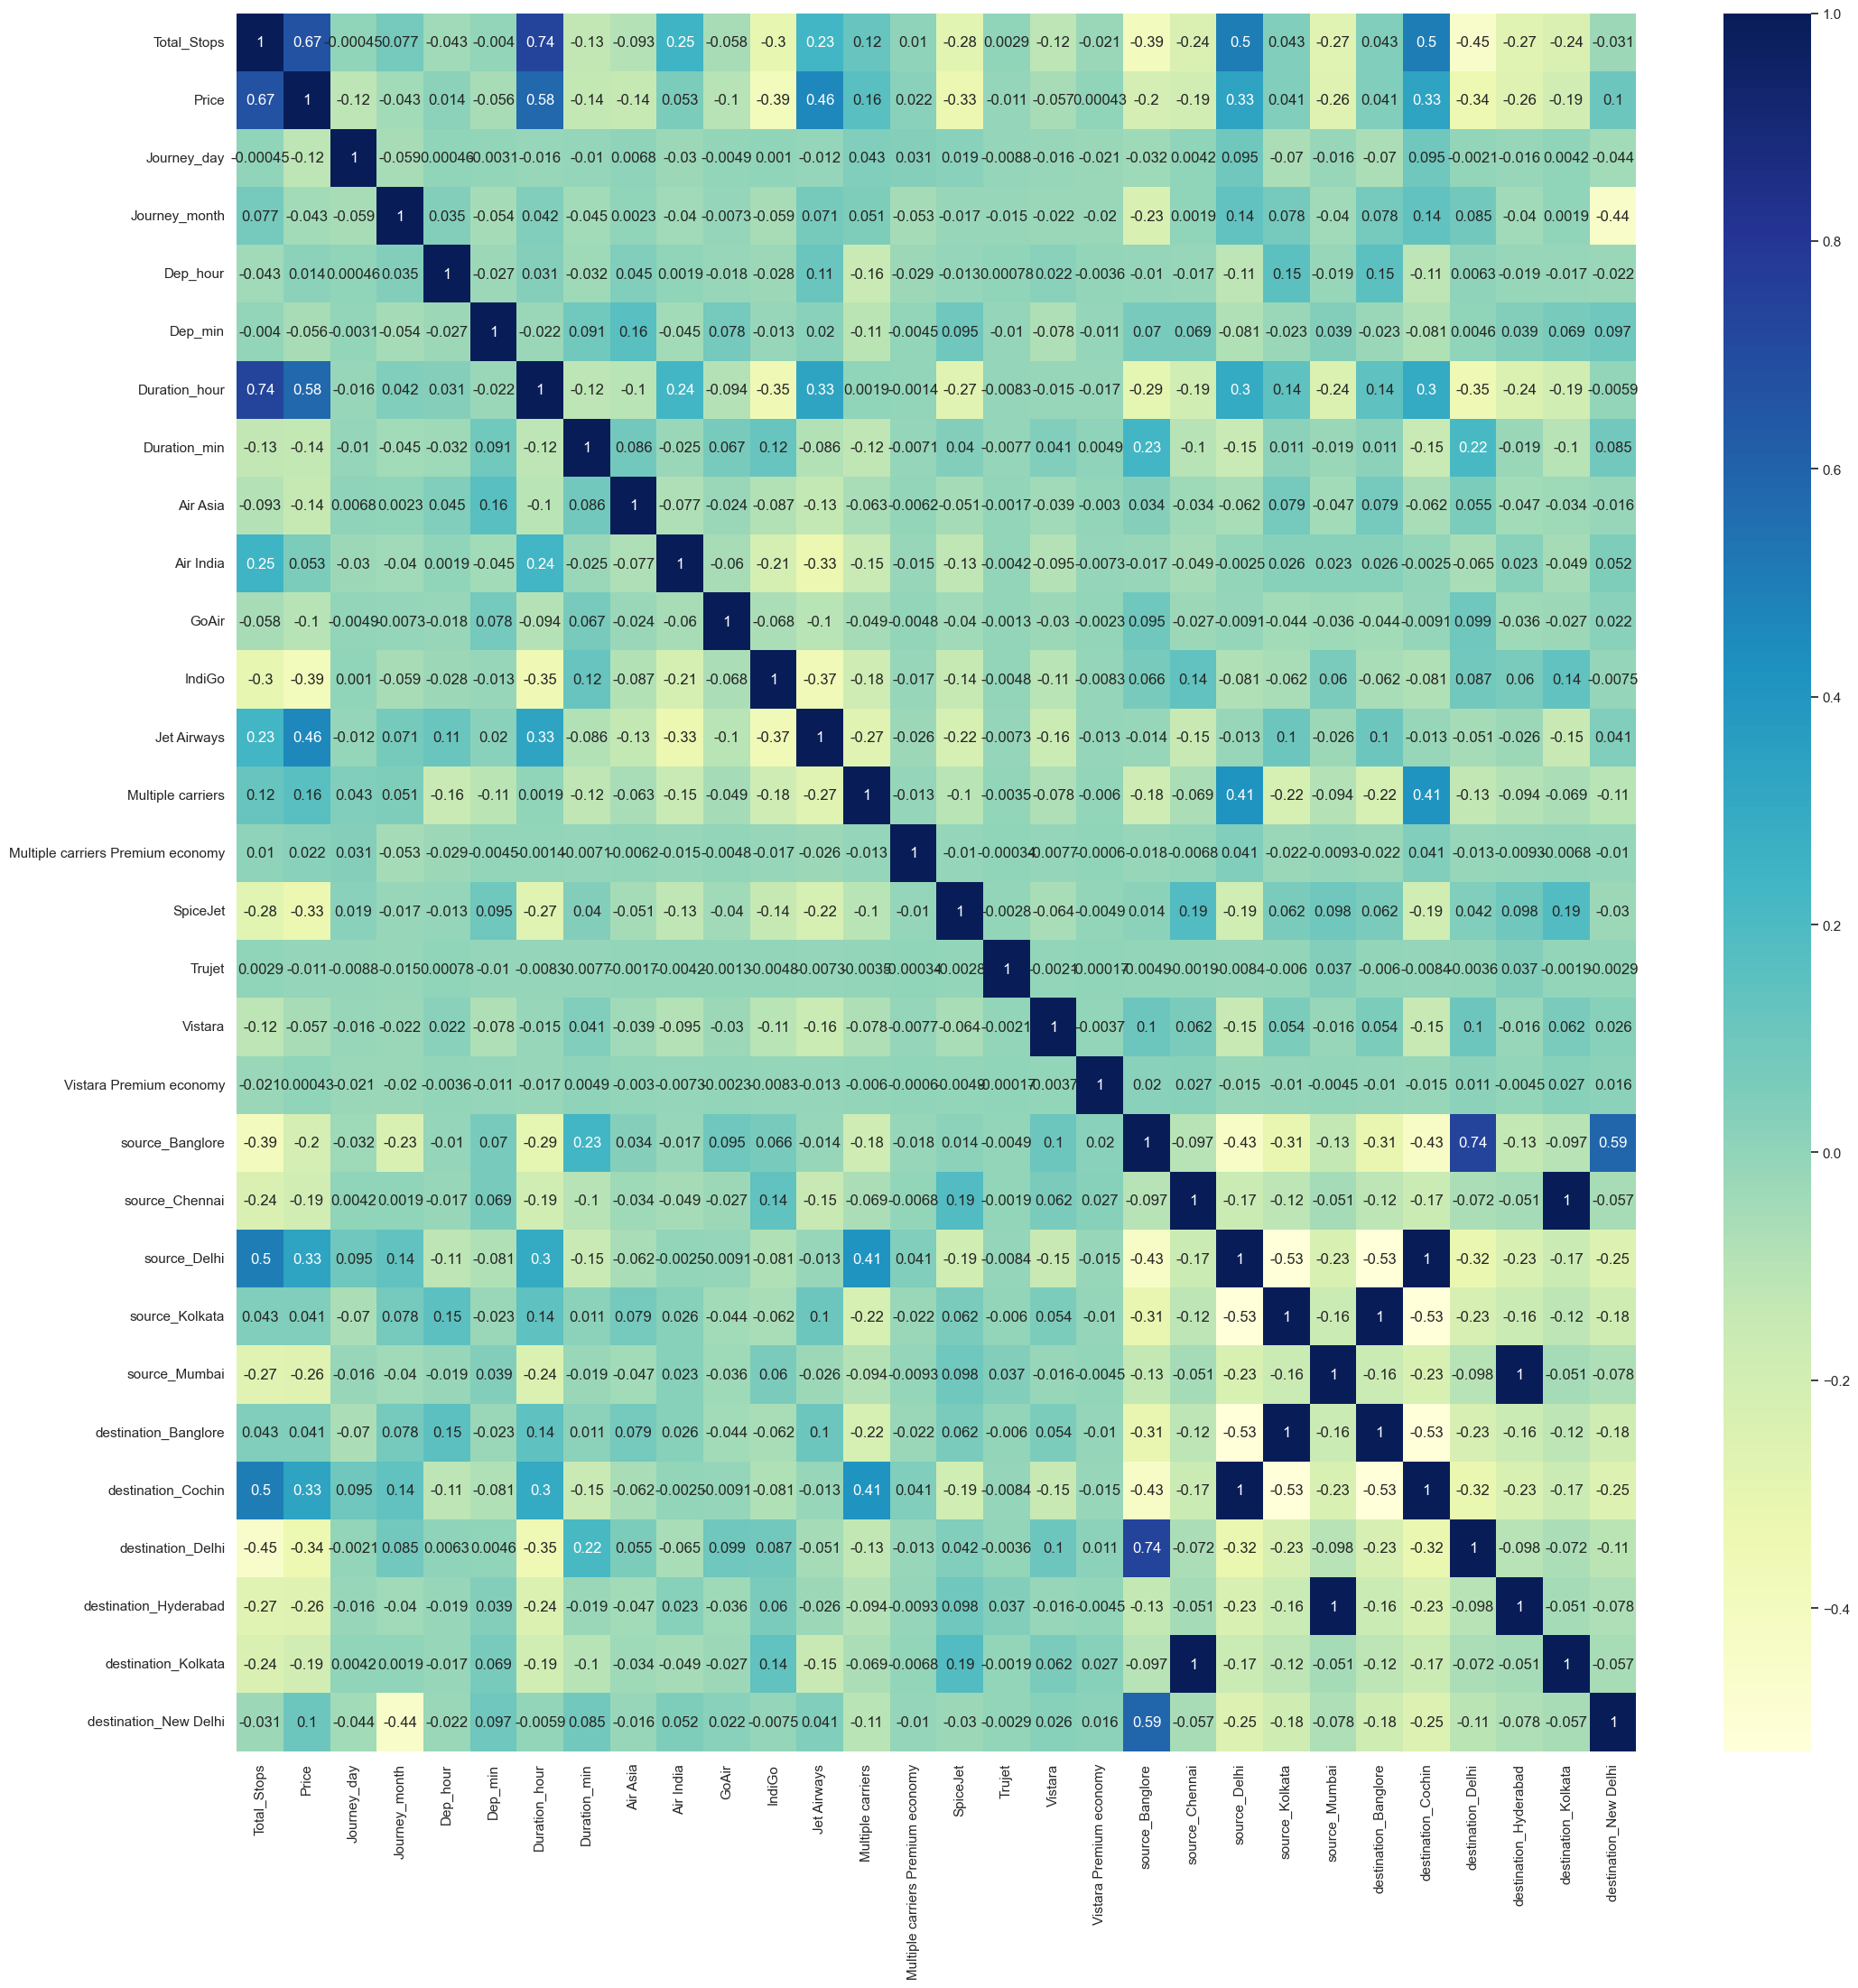

In [161]:
plt.figure(figsize=(25,25))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [162]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [163]:
print(model.coef_)
print(model.intercept_)

[ 2.64538553e+03 -5.82297329e+01 -3.44340192e+02  1.49165775e+01
 -4.86787568e+00  1.10278694e+01  9.68406545e-02  2.46166560e+03
  3.98915962e+03  2.55663933e+03  2.67771685e+03  6.53444489e+03
  5.80847477e+03  6.38001165e+03  2.15543760e+03  4.55620038e+03
  5.79368707e+03  1.90859065e+02  1.37274205e+02  2.20095757e+02
  1.60632620e+02 -7.08861647e+02  1.60632620e+02  2.20095757e+02
 -7.76063941e+02 -7.08861647e+02  1.37274205e+02  9.66923006e+02]
4090.6243907979797


In [164]:
y_pred=model.predict(test_data)
y_pred.shape

(2671,)

In [165]:
y_test=pd.read_excel("Sample_submission.xlsx")
y_test=y_test.iloc[:,0]
y_test.shape

(2671,)

In [166]:
len(test_data.columns)

28

In [167]:
# Flight is Vistara
pred_data=[[0,12,5,6,45,12,15,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False]]
# len(pred_data[0])

In [168]:
print(model.predict(pred_data))

[380.3322172]


c:\Users\Kush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [169]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hour,Duration_min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,source_Banglore,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,24,3,22,20,2,50,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,7,25,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,2,9,6,9,25,19,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,1,12,5,18,5,5,25,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,1,1,3,16,50,4,45,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [170]:
from joblib import dump

dump(model,'../savedModels/model.joblib')

['../savedModels/model.joblib']

In [171]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10486 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10486 non-null  int64
 1   Journey_day                        10486 non-null  int32
 2   Journey_month                      10486 non-null  int32
 3   Dep_hour                           10486 non-null  int32
 4   Dep_min                            10486 non-null  int32
 5   Duration_hour                      10486 non-null  int64
 6   Duration_min                       10486 non-null  int64
 7   Air Asia                           10486 non-null  bool 
 8   Air India                          10486 non-null  bool 
 9   GoAir                              10486 non-null  bool 
 10  IndiGo                             10486 non-null  bool 
 11  Jet Airways                        10486 non-null  bool 
 12  Multiple carriers      